In [1]:
import numpy as np
from scipy import stats as st
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
population = np.random.normal(5, 3, 100000)

In [3]:
def two_tailed_t_test(n_samples=10000, mu0=5, sample_size=100):
    p_vals = []
    t_vals = []
    se_vals = []

    for _ in tqdm(range(n_samples)):
        sample = np.random.choice(population, sample_size)

        se = np.std(sample, ddof=1) / np.sqrt(sample_size)

        t = (np.mean(sample) - mu0) / se

        if t > 0:
            p = (1 - st.t.cdf(t, df=sample_size - 1)) * 2
        else:
            p = st.t.cdf(t, df=sample_size - 1) * 2

        p_vals.append(p)
        t_vals.append(t)
        se_vals.append(se)
    return p_vals, t_vals, se_vals

In [4]:
def plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=0.05, save=None):
    plt.figure(figsize=(16, 4))

    ax1 = plt.subplot(1, 3, 1)
    ax1.hist(p_vals, bins=25, density=True)
    ax1.axvline(x=alpha, color='r')
    ax1.set_xlim([0, 1])
    ax1.set_title("p-value")

    ax2 = plt.subplot(1, 3, 2)
    ax2.hist(t_vals, bins=25, alpha=0.5, density=True)
    ax2.hist(np.random.normal(0, 1, 10000), bins=100, alpha=0.5, density=True)
    ax2.set_title("t-statistic")

    ax3 = plt.subplot(1, 3, 3)
    ax3.hist(se_vals, bins=25, density=True)
    ax3.set_title("se, mean=%.2f"%np.mean(se_vals))

    if save:
        plt.savefig("figs/%s.png"%save)
    plt.show()

#### When Null is True
* p-value is uniformly distributed.
* p-value distribution is independent of sample size.
* t-statistic follows unit normal (for sample size >= 40).

100%|██████████| 10000/10000 [00:01<00:00, 5156.98it/s]


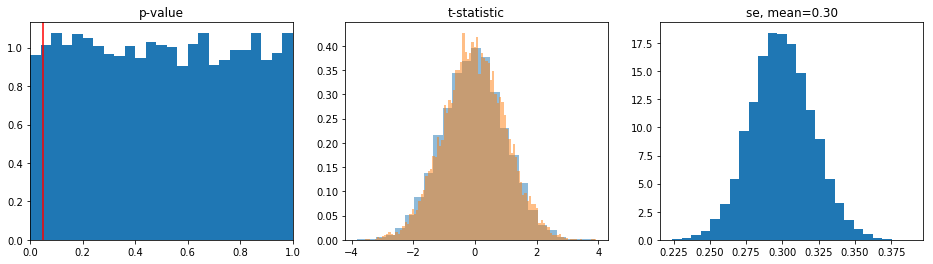

reject null for 4.92% of the trials


In [5]:
alpha=0.05
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=10000, mu0=5, sample_size=100)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))

100%|██████████| 10000/10000 [00:02<00:00, 4249.76it/s]


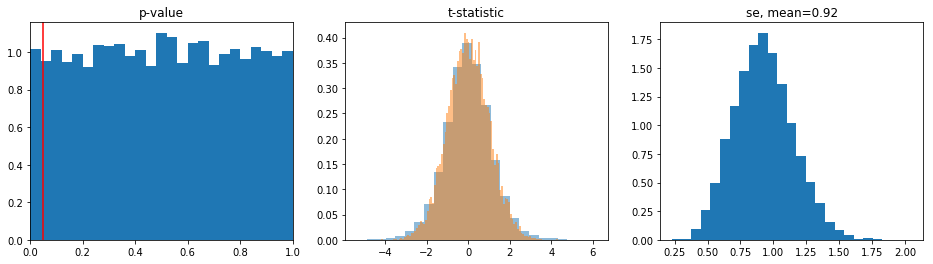

reject null for 5.04% of the trials


In [6]:
alpha=0.05
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=10000, mu0=5, sample_size=10)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))

#### When Null is False
* smaller effect size reduces power
* large sample size increases power
* large alpha increases power
* number of samples does not affect power

100%|██████████| 10000/10000 [00:02<00:00, 4987.46it/s]


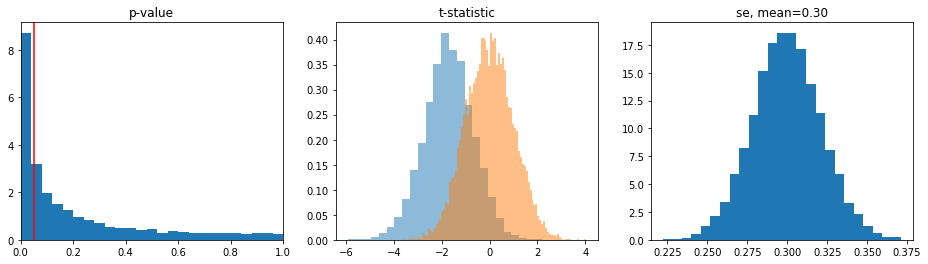

reject null for 38.83% of the trials


In [7]:
alpha=0.05
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=10000, mu0=5.5, sample_size=100)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))

100%|██████████| 10000/10000 [00:01<00:00, 5319.27it/s]


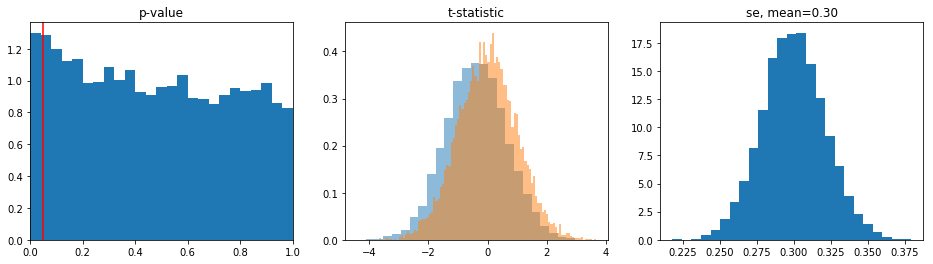

reject null for 6.62% of the trials


In [8]:
# smaller effect size decreases power
alpha=0.05
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=10000, mu0=5.1, sample_size=100)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))

100%|██████████| 10000/10000 [00:02<00:00, 4861.97it/s]


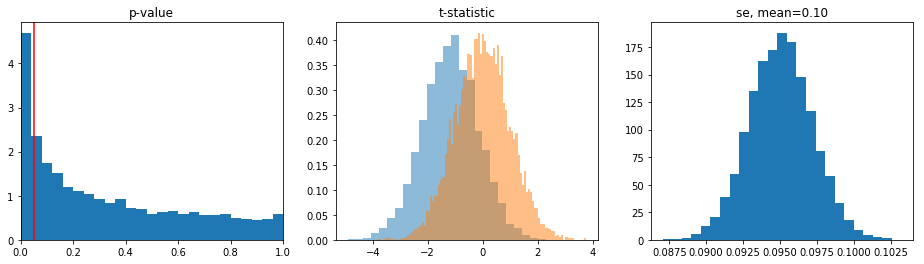

reject null for 21.41% of the trials


In [9]:
# large sample size increases power (reduces SE)
alpha=0.05
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=10000, mu0=5.1, sample_size=1000)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))

100%|██████████| 10000/10000 [00:02<00:00, 4867.45it/s]


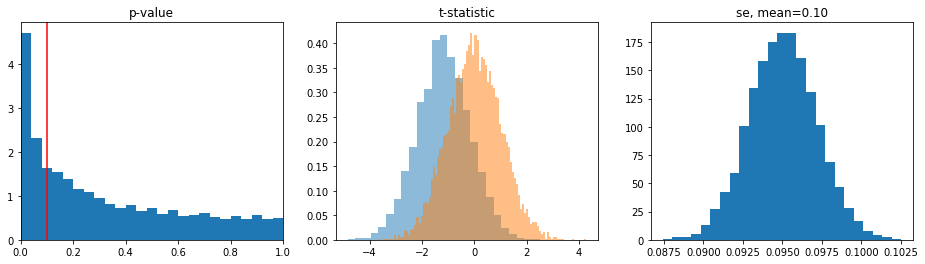

reject null for 31.42% of the trials


In [10]:
# large alpha increases power
alpha = 0.1
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=10000, mu0=5.1, sample_size=1000)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))

100%|██████████| 100000/100000 [00:21<00:00, 4751.25it/s]


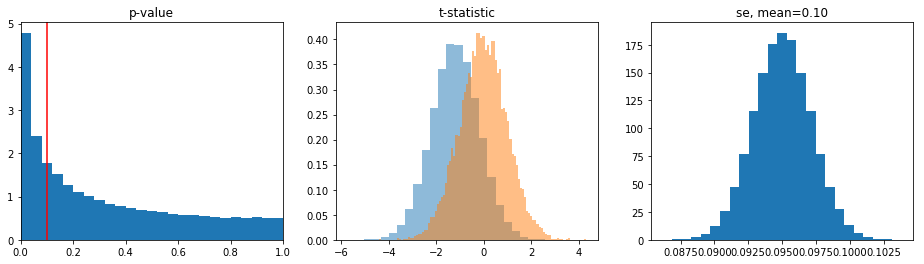

reject null for 32.53% of the trials


In [11]:
# number of samples does not affect power
alpha = 0.1
p_vals, t_vals, se_vals = two_tailed_t_test(n_samples=100000, mu0=5.1, sample_size=1000)
plot_sampling_distribution(p_vals, t_vals, se_vals, alpha=alpha, save=None)
print("reject null for %.2f%% of the trials"%(100 * sum(np.array(p_vals) < alpha) / len(p_vals)))